In [5]:
# Import Packages
import os
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [6]:
with zipfile.ZipFile('../data/processed/train.zip', 'r') as z:
    z.extractall('../data/raw')

with zipfile.ZipFile('../data/processed/test1.zip', 'r') as z:
    z.extractall('../data/raw')

In [7]:
import shutil
import os

# Directorios de origen y destino
data_dir = '../data/raw'
train_folder = '../data/raw/train'
test_folder = '../data/raw/test1/'

# Directorios de destino específicos para dog y cat
dog_folder = os.path.join(data_dir, 'dog')
cat_folder = os.path.join(data_dir, 'cat')

# Crear carpetas solo si no existen
os.makedirs(dog_folder, exist_ok= True)
os.makedirs(cat_folder, exist_ok= True)

# Mover archivos dog a la carpeta dog y archivos cat a la carpeta cat
for filename in os.listdir(train_folder):
    # Obtener la ruta completa del archivo de origen
    source_path = os.path.join(train_folder, filename)
    
    if 'dog' in filename.lower():
        # Obtener la ruta completa del archivo de destino en la carpeta dog
        destination_path = os.path.join(dog_folder, filename)
        
        # Mover solo si la carpeta de destino no contiene ya el archivo
        if not os.path.exists(destination_path):
            shutil.move(source_path, destination_path)
    elif 'cat' in filename.lower():
        # Obtener la ruta completa del archivo de destino en la carpeta cat
        destination_path = os.path.join(cat_folder, filename)
        
        # Mover solo si la carpeta de destino no contiene ya el archivo
        if not os.path.exists(destination_path):
            shutil.move(source_path, destination_path)

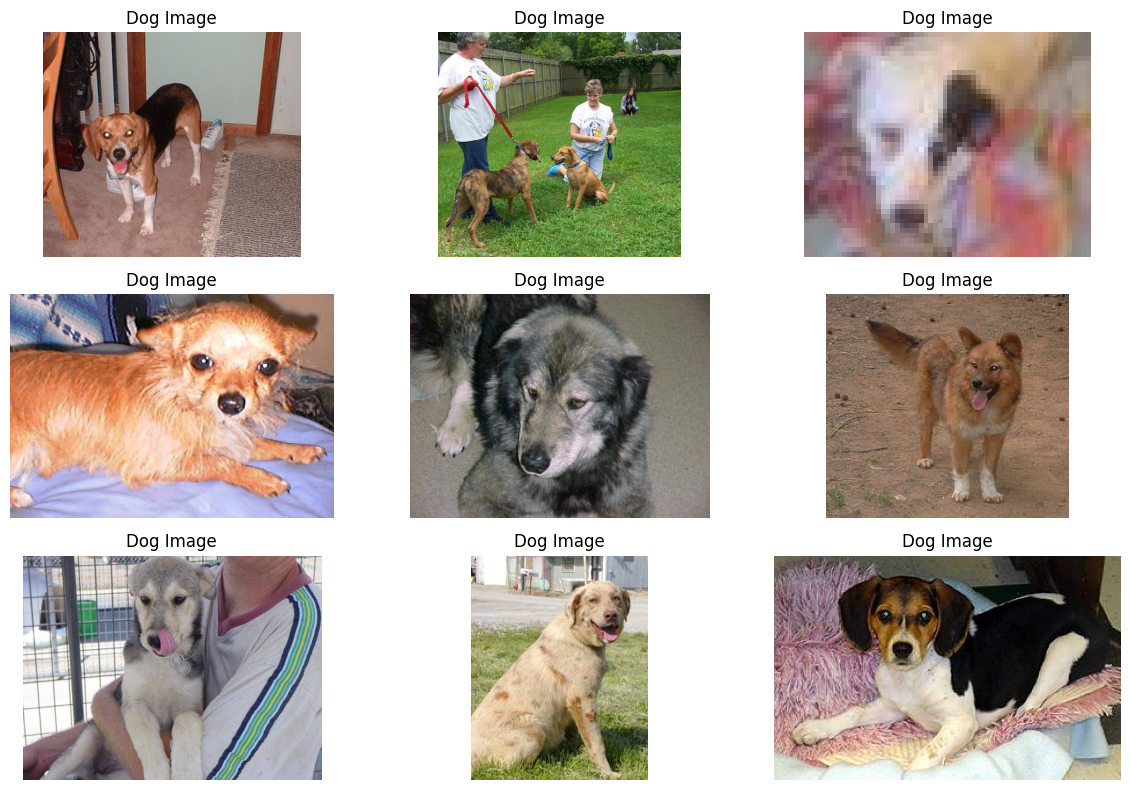

In [8]:
# Path to the directory containing your image data
data_dir = '../data/raw'

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, 'dog')

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

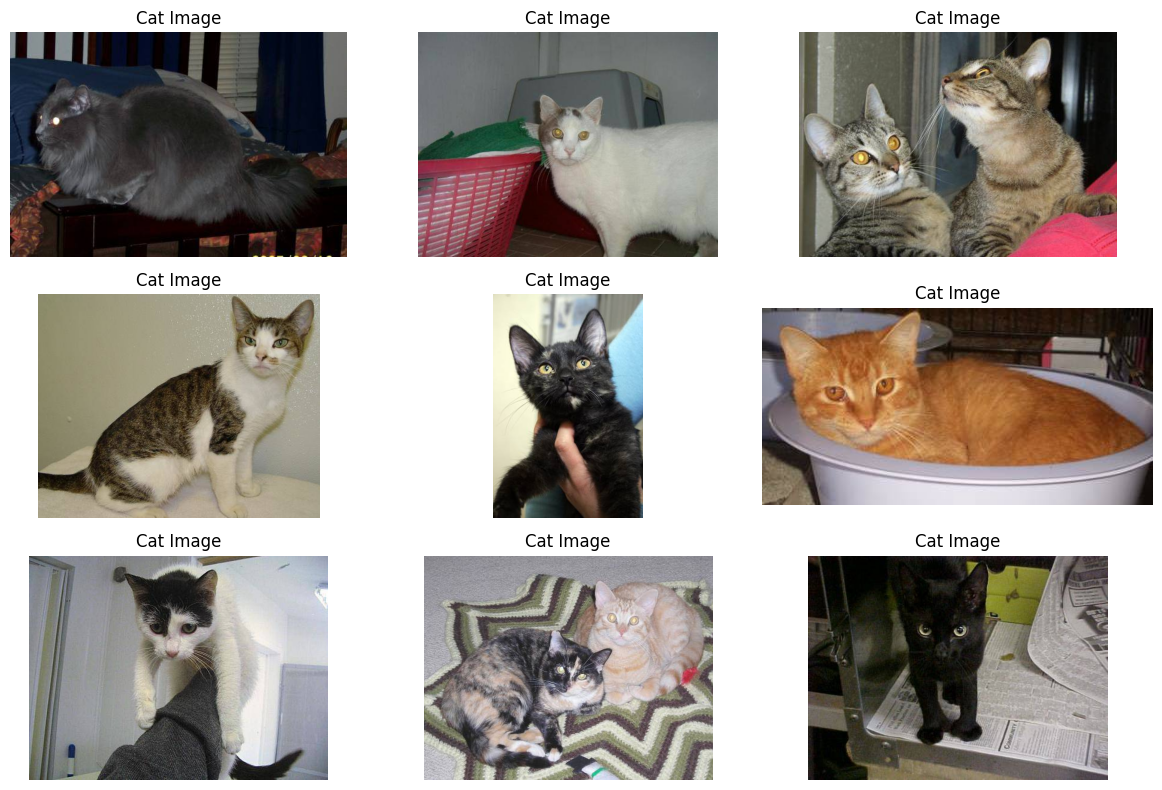

In [9]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = '../data/raw'

# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, 'cat')

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

**Create the Images Data Sets**

In [10]:
# Create a Data Generator for all the pictures so they are all equal in size
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = '../data/raw'
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['dog', 'cat'] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=['test1'] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


**Train The Model**

In [11]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [12]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [13]:
# Train the Model
model.fit(train_data, epochs=1)

782/782 [==============================] - 3756s 5s/step - loss: 17.6914 - accuracy: 0.4948


**Save the Model**

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('../models/catsdogs.h5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='auto')
hist = model.fit(train_data, steps_per_epoch=100, validation_data=test_data, validation_steps=10, epochs=3, callbacks=[checkpoint,early])

Epoch 1/3


100/100 [==============================] - ETA: 0s - loss: 0.7128 - accuracy: 0.4997
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/catsdogs.h5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 485s 5s/step - loss: 0.7128 - accuracy: 0.4997 - val_loss: 1.3866 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5072
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 486s 5s/step - loss: 0.6930 - accuracy: 0.5072 - val_loss: 1.3950 - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.5116
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 486s 5s/step - loss: 0.6967 - accuracy: 0.5116 - val_loss: 1.3873 - val_accuracy: 1.0000


Due to GitHub Space constraints, the model will not be inside the models folder. Same for the pictures,  they aren't in the repository

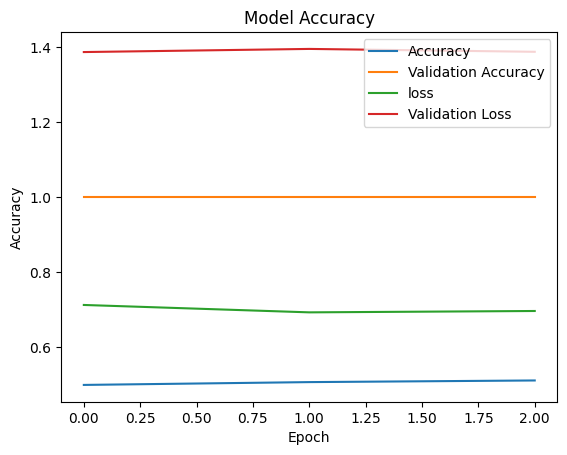

In [16]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Configure the Plot Layout
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])

# Plot
plt.show()

**Try and Predict the Images**

1/1 [==============================] - 0s 177ms/step
cat


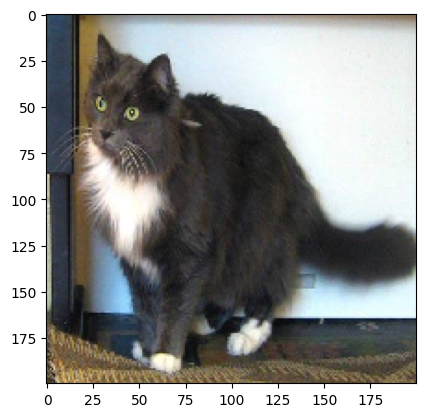

In [18]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img('../data/raw/test1/9.jpg',target_size=(200,200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model('../models/catsdogs.h5')
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print('cat')
else:
    print('dog')